Bu notebooktan tam verim almak için <a href="https://nbviewer.org/github/VolkiTheDreamer/PythonRocks/blob/master/Machine%20Learning/Supervised/E2E_Classification_ML_Main_Concepts_Part_I.ipynb">Uçtan Uca ML notebookuyla</a> birlikte incelenmesini öneriyorum. Ve ayrıca <a href="https://github.com/VolkiTheDreamer/PythonRocks/tree/master/mypyextj">kendi modüllerimden oluşan paketimi</a> de indirmeniz gerekmektedir. Bunun sebebi, sizi gereksiz kod kalabalığı ile yormak istemeyip dikkatinizi sadece buradaki ana konuya toplamaktır. Kodları isterseniz ayrıca inceleyebilirsiniz. İndirmek için şu adresi kullanın: https://minhaskamal.github.io/DownGit/#/home.

Ayrıca sık sık <a href="Linear%20Regression.ipynb">Lineer Regresyon</a> notebookuma da referansta bulunacağım.

# Gerekli kütüphanelerin import edilmesi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mypyext import dataanalysis as da
import sweetviz as sv

all warnings will be shown


In [6]:
#preprocessors
from mypyext import ml
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,StratifiedKFold,RepeatedKFold,RepeatedStratifiedKFold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,IterativeImputer,KNNImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from category_encoders import OrdinalEncoder as COE
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin,BaseEstimator
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.feature_selection import VarianceThreshold,SelectKBest, chi2, f_classif, mutual_info_classif,RFE,RFECV

# Şablon

Algoritmaları anlatırken aşağıdaki şablona göre gitmeye çalışacağım:

- **Teori**: 
    - Algoritmanın kısa tanımı ve nasıl çalıştığı
    - Çözülmeye çalışılan problemin detayı
    - Manuel implementasyon: Hazır kütüphane olmadan kendimiz nasıl kodlardık(Bu her zaman bulunmayabilir)    
    - Varsayımlar/Ön kontroller: Bu algoritmayı kullanmak için hangi şartların sağlanması gerekir
    - Önemli hususlar: bunun içinde algoritmanın nelere duyarlı olduğu, özellikle nelere dikkat edilmesi gerektiği ve (hyper)parametrelerde özellikle dikkat edilmesi gereken hususlar olacak. Ayrıca alogritmanın özellikle iyi olduğu alanlar varsa bunlara da bu başlıkta değineceğiz
    
- **Kod pratiği/Örnekler**: Konuyu pekişitrmek adına bir veya birkaç örnek. Konular ilerledikçe örnek sayısı azalabilir. Sırayala okunacağını düşünerek konununu pekişmesi adına ilk başlarda daha fazla örnek olabilir.
- **Kaynaklar**: En sonda toplu olarak bulunmakla birlikte, yer yer aralarda da gerektiği durumlarda linkler verilecektir.

# Teori

##  Nedir? Nasıl çalışıyor? Nerde/Niçin kullanılır?

Logistic Regresion(LogReg), bir sampleın hangi sınıfa/labela ait olduğunu tahmin etmeye çalışan, en temel algoritmalardan bir tanesidir. Bunu, lineer regresyondaki(LinReg)'nin aksine lineer bir fonksiyonuyla değil de, non-lineer bir fonksiyon olan **logit** fonksiyonu kullanarak hesaplar.

LogReg tanıtılırken çoğunlukla şöyle anlatılır: *LogReg, adında Regression geçmesine rağmen bir regresyon algoritması değildir, classification algoritmasıdır*. Sonra başkaları bunu düzeltir ve der ki *Hayır, aslında bu bir lineer modeldir, zaten sklearn içinde de linear_model modülü içinde yer alır*. Evet, doğrudur, bu bir lineer modeldir, tıpkı LinReg'da olduğu gibi betalar yani katsayılar vardır ve lineer bir desicion boundarysi vardır. Devam edelim. Sonra başka bir kaynak der ki, *Evet her ne kadar arka planda bu bir lineer modelse de, sonuçta bir classification algoritmasıdır.* 

Hadi bu karmaşaya bi son verelim. Bu algoritmanın yaptığı, bir veri setindeki kayıtları sınıflandırmak değil, bunların belirli bir sınıfa ait olma olasılığını bulmaktır; sınıflandırma kısmı biz son kullanıcılara kalır. Belirlediğimiz thresholda göre sınıfı biz belirlemiş oluruz. Özetle LogReg, `classification(sınıflandırma) amaçlı kullanılan linear bir modeldir ve özünde bir regresyon algoritmasıdır.` <a href="https://towardsdatascience.com/how-are-logistic-regression-ordinary-least-squares-regression-related-1deab32d79f5">Şuraya</a> da bi bakın derim.

Logistic kelimesi `logit` fonksiyonundan geliyor, bildiğimiz lojistikle(taşımacılık, mal temini v.s) bi alakası yok. Bu model de <a href="Linear Regression.ipynb">LinReg</a> gibi inputların ağırlıklarını hesaplar, ancak bunları doğrudan çıktı olarak vermek yerine bunları bu logit fonksiyonuna göndererek 0-1 arasında bir olasılık hesaplatır. Olasılıkları doğrudan kullanmak yerine log'unun kullanılması bir olayın olma olasılığı ile olmama olasılığı arasında simetri yakalama amacıyladır. Aşağıdaki videolardan birinde bunu daha iyi anlayacaksınız. Ben de biraz aşağıda bu konulara değineceğim.

LogReg, en temel algoritmalardan biri olup, aynı zamanda çoğu durumda ilk başta denenmesi gerekenlerdendir. Birçok kullanım alanı olmakla birlikte tipik olarak "mail spam mi değil mi", "bu hücre kanser hücresi mi değil mi", "bu işlem fraud işlemi mi değil mi" gibi binary classification(yani 1/0, True/False, Yes/No) problemlerinde kullanılır, bununla birlikte multi-class classification da yapılabilmektedir.

Evet şimdi tanımlarda biraz daha derine inmeden, aşağıdaki videoları izleyelim, ama mutlaka izleyelim.

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('yIYKR4sgzI8')
# YouTubeVideo('ARfXDSkQf1Y')
# YouTubeVideo('8nm0G-1uJzA')
# YouTubeVideo('vN5cNN2-HWE')
# YouTubeVideo('BfKanl1aSG0')
# YouTubeVideo('xxFYro8QuXA')  

<div class="mark">
DİKKAT:</div><i class="fa fa-lightbulb-o "></i>Dedik ki, bu algoritma sadece bir olasılık hesaplar. Sklearn default olarak bu olasılık %50 üzerindeyse bir instanceı ilgili sınıfa sokar. Ama bu çok doğru bi yaklaşım değildir. Başka sık yapılan bir hata da threshold olarak prior probability kullanmak, yani bir sınıfın toplam küme içindeki oranını kullanmaktır, ki bu da çok doğru bi yaklaşım değildir. Burda thresholdu iş problemine göre kendimiz belirlemeliyiz. Bunla ilgili detay açıklamaları ve örneği <a href="E2E_Classification_ML_Main_Concepts_Part_I.ipynb">Uçtan Uca ML projesi notebookunda</a> bulabilirsiniz.

## Çözülecek problem

Burdaki soru şudur: Elimizdeki prediktörleri kullanarak bir instance'ın hangi sınıfta olma olasılığını modelleyebilir miyiz?

Logistic Regression'da bu soruya vereceğimiz cevap bizi Deep Learning'i(DL) de anlamaya yaklaştırackatır. Göreceksiniz, LogReg'in mantığı DL'in mantığına ne kadar benziyor. Zira burada da elimizdeki feature değerlerini bir aktivasyon fonksiyonuna(sigmoid) sokma var, DL'de de; keza burda da optimizasyon yöntemi olarak Gradient Descent kullanılıyor, DL'de de. DL ile ilgilenmeyi düşünüyorsanız LogReg'i ve onun temelinde yer alan logit/sigmoid fonksiyonlarını, cost functionları ve gradient descent'i anlamak çok önemli.

### Logit ve sigmoid fonksiyonları

Şimdi, x'leri kullanarak bir Y olayı olur mu bunun olaslığını bulmak istiyoruz. İlk olarak klasik LinReg benzeri bir eşitlikle ilerlemeyi deneyelim.

$$P(Y=1|X)= p=\beta_0 + \beta_1x$$

Burda bi sıkıntı var, zira eşitliğin sağ tarafı herhangi bi değer(-inf ile +inf arasında) alabilir, halbuki bize pozitif bi değer lazım, zira olasılık denen şey pozitif bir değerdir. O zaman yukarıdaki gibi değil de exponasniyel bi denklem mi arask., $e^{\beta_0+\beta_1x}$ gibi. Bu işimizi görür gibi ama bunda da bi sıkıntı var ki, bu da artı sonsuza kadar gidiyor, bize 0-1 arası değer lazım. O zaman bunu aşağıdaki gibi ifade edelim. Böylece hem pozitif hem 0-1 arası değer elde ederiz.

$$\large p=\frac{e^{\beta_0+\beta_1.x}}{1+e^{\beta_0+\beta_1.x}}$$

Burada karşımızda `odds` kavramı çıkıyor. O da şöyle hesaplanır:<br><br>

$$\large odds=\frac{\text{bi olayın olma olasılığı}}{\text{bi olayın olmama olasılığı}}=\frac{P(Y=1)}{P(Y=0)}=\frac{p}{1-p}$$

Yukardaki kutudaki değerleri yerine koyarsak, odds şöyle çıkar:

$$\large e^{\beta_0+\beta_1.x}$$

Şimdi örnek probabilityler(p) üzerinden gidelim.

In [7]:
p=np.array([0, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.999, 0.9999, 1]) #eventin olma olasılığı
notp=np.array(p[::-1]) #eventin olmama olasılığı
odds=p/notp

C:\Users\volka\AppData\Local\Temp/ipykernel_18528/1686613978.py:3: RuntimeWarning: divide by zero encountered in true_divide
  odds=p/notp


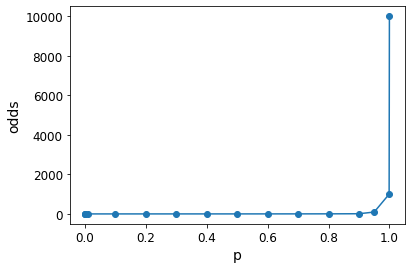

In [8]:
plt.plot(p,odds,"o-")
plt.xlabel("p")
plt.ylabel("odds");

Burda olayın olma olasılığı arttıkça odds ratio'nun da astronomik seviyelere çıktığını görüyoruz. Yani bi asimetriklik var. Bunu düzeltmek lazım. Nasıl? İki tarafın da log'unu alarak. odds'un logunu aldığımızda karşımıza çıkan fonksiyon `logit fonksiyonu` oluyor işte. Bu sayede karşımızda çıkan katsayıların yorumlanması daha kolay olacaktır, zira artık elimizde lineer bir denklem vardır.

$$\large odds=\frac{p}{1-p} \;\;\;\;\;\text{-----log alalım---->}\;\;\;\;\; ln(odds)=ln(\frac{p}{1-p}) = ln(e^{\beta_0+\beta_1x})=\beta_0+\beta_1x$$

Farkettiyseniz logit fonksyionun sonucu yine p'nin kendisi oluyor.

C:\Users\volka\AppData\Local\Temp/ipykernel_18528/2653175882.py:1: RuntimeWarning: divide by zero encountered in log
  logit=np.log(odds)


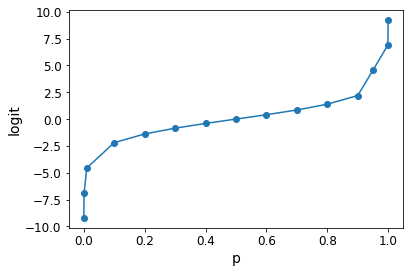

In [9]:
logit=np.log(odds)
plt.plot(p,logit,"o-")
plt.xlabel("p")
plt.ylabel("logit");

Artık elimizde lineer bir denklem var. X, 1 birim arttıkça Y'nin logiti $\beta_1$ kadar değişir.

Şimdi son olarak sınıf olasılıklarını bulmak için bu logit fonksiyonun da aşağıdaki gibi tersi alınır, ki buna da `sigmoid function` denir. Burda x ve y arasındaki ilişki non-lineer olmuştur.

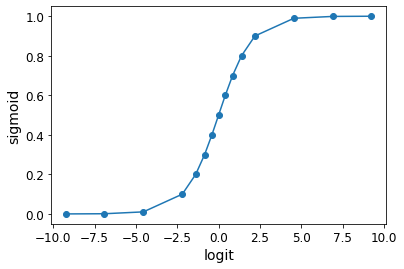

In [10]:
sigmoid=1/(1+np.exp(-logit))
plt.plot(logit,sigmoid,"o-")
plt.xlabel("logit")
plt.ylabel("sigmoid");

Şimdi $\beta_0+\beta_1x$ denklemimizi düşündüğümüzde burdaki betaları nasıl bulacağız? Esas çözülecek problem bu. En küçük kareler yöntemini(OLS) kullanamayız, çünkü ilişki lineer değil. Bu sefer `Maximum Likelihood Estimation(MLE)` metodunu kullanacağız ve bunu maksimize eden katsayıları bulmaya çalışacağız. Yani karşımızda yine bir optimizasyon görevi var. 

Şimdi hesapları yapalım:

$$\large P(Y=1\;|\;x)= \frac{1}{1+e^{-(\beta_0+\beta_1x)}} = F_\beta(x)$$
<br>

$$\large P(Y=0\;|\;x)= 1 - F_\beta(x)$$

<p>Tek bir instance(gözlem) için likelihood tahmini genelleştirilmiş haliyle şöyle olur</p><br>

$$\large P(Y=y\;|\;x)= [F_\beta(x)]^y.[1-F_\beta(x)]^{1-y}$$

Burda y'ler gerçek değerler iken $F_\beta$'lar tahmini değerlerdir. Tüm instanceler için bu olasılıklar aşağıdaki gibi çarpılır ve nihai Likelihood fonksiyonu elde edilir.<br>

$$\large  L = \prod_{i=1}^N[F_\beta(x)]^{y_i}.[1-F_\beta(x)]^{1-{y_i}}$$

Bu çarpım işlemi işleri karmaşıklaştırır, üstelik bilgisayar belleği için de yüktür. Biz yine her iki tarafın logunu alalım, o yüzden fonksiyonumuzun adı artık Likelihood değil `Log Likelihood` olur. Log aldığımızda neler oalcağını bi hatırlayalım,

$$log(a^b)=b.log(a)\;\; ve \;\;log(a.b)= log(a)+log(b)$$

ve sonuç

$$\large  log(L) = LL = \sum_{i=1}^N[{y_i}.log(F_\beta(x)^i) + (1-{y_i).log(1-F_\beta(x)^i)]}$$

veya 

$$\large  LL = \sum_{i=1}^N[{y_i}.log(p_i) + (1-{y_i).log(1-p_i)]}$$


Bu nihai fonksiyona **cross entropy** adı verildiğini de görebilirsiniz. Bunun binary case için özel hali ise **binary cross entropy** olup aşağıdaki gibidir.

$$\large  LL = \sum_{i=1}^N{y_i}.log(p_i)$$

Bi adımımız daha kaldı o da, maximize edilmeye çalışılan bu fonksiyonu minimize etmeye çalışmak. Bunun için de başına bi "-" konur. 

$$\large  Negatif Log Likelihood = NLL = -\sum_{i=1}^N{y_i}.log(p_i)$$

Nihai fonksiyonumuz negatif işaretlidir, bu artık bir **cost function** olmuştur. **iterasyon** ile bu maliyet fonksiyonunu minimize etmeye çalışacağız. Bunun için de `Gradiend Descent(GD), Stokastik GD, Newton metodu` gibi metodlar var. Biz burada GD'ye bakacağız. 

Şimdi öncelikle GD öncesine kadarki olan kısmı, yani yukarıda anlattıklarımızı bir de şematik olarak görelim.

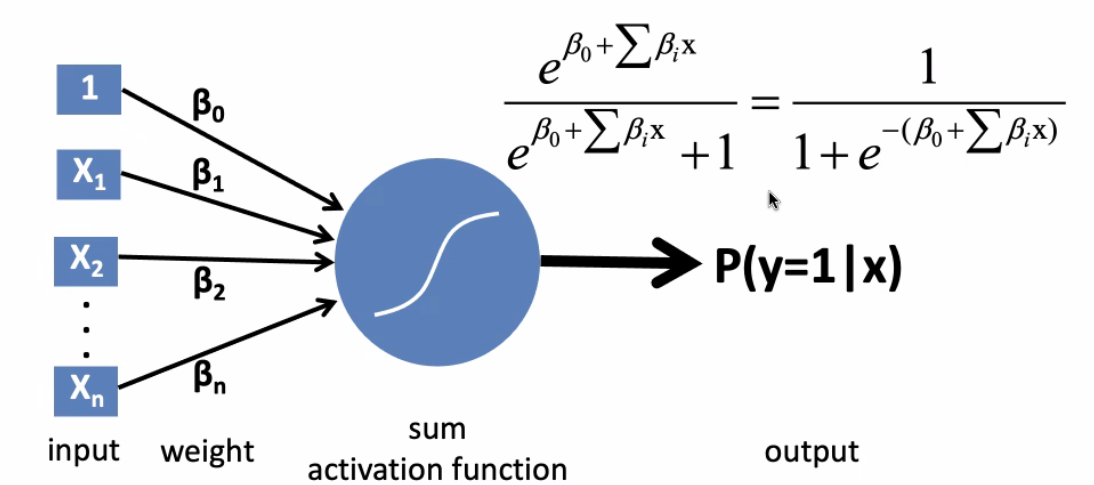
<p style="font-size:smaller;text-align:center">Görsel: H.S Ölmez - Sabanci University</p>

Veya Kaggle master Kaan hocamızın <a href="https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners#Logistic-Regression">gösterdiği</a> gibi beta yerine weight anlamında w'ler de kullanılabilir, ki bu şematik gösterim Neural Networks(Sinir Ağları/Derin Öğrenme) anlatımında da karşımıza çıkacak.

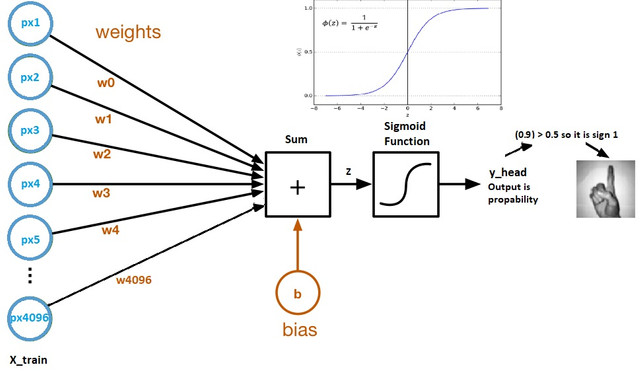

### Gradient Descent

Bunu LinReg notebookunda görmüştük, oraya tekrar bakabilirsiniz. Regresyon değil de classification bağlamında görmek için Kaan hocamızın yine yukarıdaki linkine bakabilirsiniz. Bunlara ek olarak aşağıdaki linklerden de gerek GD detayını gerek manuel implementasyonu görebilirsiniz.

- https://towardsdatascience.com/logistic-regression-explained-and-implemented-in-python-880955306060
- https://realpython.com/logistic-regression-python/

"Bana kısaca sen anlat" diyenler için şöyle özetleyeyim.

- Öncelikle "kaytsayıların ilk değerlerine ne verelim" sorusuyla başlanır. Bunun için bazı teknikler var, diyelim ki 0.01 verdik ve $\beta_0$(bias) için de 0 dedik.
- x'ler ile betalar(weightler) çarpılır ve toplanır. Çıkan sonuç, bir aktivasyon fonksiyonu olan sigmoid fonksiyonuna sokulur. Diyelim ki eğitim setinde bir instance'ın classını 0(not-churn) tahminledik ve gerçekten de 0'mış(veya 1 dedik ve gerçekten 1 çıktı), o zaman kaybımız(`loss`) 0'dır. Bu işlemin adı **forward propagation**'dır.
- Tüm instancelar için bu loss'ların toplamına da `cost` deniyor. Nihai amaç, cost'un minimize olması.
- Sonra başa dönüp betalar ve bias güncellenir, ki buna da **backward propagation** denir. Güncelleme işlemi de türev alarak gradient descent yöntemiyle yapıyoruz, ta ki eğim(yani türev) 0 olana kadar.

### Cost function olarak LogLoss(binary cross entropi)

Cost functionımız yukarıdaki negatif log-likelihood veya diğer adıyla binary cross entropi fonksiyonudur. Buna negative log loss da denmektedir. Yukarıda bahsedilen tüm proses boyunca bu metrik minimize edilmeye çalışılır.

$$\large  Negatif Log Likelihood = NLL = -\sum_{i=1}^N{y_i}.log(p_i)$$

Denklemden görüldüğü üzere, gerçek sınıf 1 iken eşitliğin ikinci kısmı uçuyor, 0 iken de ilk kısmı. Bu denklemin bir güzelliği de, yanlış tahmini ne kadar kendinden emin bi şekilde yaparsak(yani olasılığımız ile gerçeklik arasındaki fark ne kadar çok açıksa) bunun daha fazla cezalandırılmasıdır. Mesela aşağıdaki örneğe bakalım,

In [11]:
prd=[0.99, 0.99, 0.01, 0.01] #tahmin olasılıkları
act=[1, 0, 1, 0] #gerçek değerler

for i in range(len(act)):    
    logloss=-(act[i]*np.log(prd[i])+(1-act[i])*np.log(1-prd[i]))
    normalloss=np.abs(act[i]-prd[i])
    print(f"actual:{act[i]}, True olasılığı:{prd[i]:.2f}, logloss:{logloss:.2f}, normalloss:{normalloss:.2f}")

actual:1, True olasılığı:0.99, logloss:0.01, normalloss:0.01
actual:0, True olasılığı:0.99, logloss:4.61, normalloss:0.99
actual:1, True olasılığı:0.01, logloss:4.61, normalloss:0.99
actual:0, True olasılığı:0.01, logloss:0.01, normalloss:0.01


Aşağıda daha detaylı bilgiler edinebilrsiniz ancak özet olarak şunu söyleyebiliriz. Regresyon analizlerinden genelde SSE(Sum of Squared Errors), classficationda ise Log Loss/CrossEntropy Loss optimize edilmeye çalışılır. Tabi classficationda classlara farklı ağırlıklara vererek bu cost functionları modifiye etmek de mümkündür. Bunun nasıl yapıldığını <a href="E2E_Classification_ML_Main_Concepts_Part_II.ipynb">Uçtan uca ML projesinde</a> görebilirsiniz.

Bu konu da önemli bir konu olup ilave okumalar yapmanızı öneririm

- https://towardsdatascience.com/cross-entropy-negative-log-likelihood-and-all-that-jazz-47a95bd2e81
- https://towardsdatascience.com/intuition-behind-log-loss-score-4e0c9979680a
- https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
- https://towardsdatascience.com/common-loss-functions-in-machine-learning-46af0ffc4d23
- https://towardsdatascience.com/understanding-the-3-most-common-loss-functions-for-machine-learning-regression-23e0ef3e14d3
- https://www.analyticsvidhya.com/blog/2019/08/detailed-guide-7-loss-functions-machine-learning-python-code/
- https://www.analyticsvidhya.com/blog/2020/11/binary-cross-entropy-aka-log-loss-the-cost-function-used-in-logistic-regression/
- https://www.data4v.com/log-loss-as-a-performance-metric/
- https://medium.com/konvergen/cross-entropy-and-maximum-likelihood-estimation-58942b52517a
- https://medium.com/@phuctrt/loss-functions-why-what-where-or-when-189815343d3f
- https://algorithmia.com/blog/introduction-to-loss-functions
- https://towardsdatascience.com/understanding-sigmoid-logistic-softmax-functions-and-cross-entropy-loss-log-loss-dbbbe0a17efb
- https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a
- http://www.awebb.info/probability/2017/05/18/cross-entropy-and-log-likelihood.html

Son olarak şunu da söylemekte fayda var. GridSearch içinde de scoring parametresine de accuracy/precision gibi metriclere ek olarak neg_log_loss da verebiliyoruz. Yani neg_log_loss hem Logistic Regresyonunu optimize etmeye çalıştığı bir **fonksiyondur** hem de bir **evaluation metriğidir**. Daha detay bilgi için <a href="E2E_Classification_ML_Main_Concepts_Part_I.ipynb">Uçtan uca ML projesi(PartI)</a> içinde GridSearch bölümündeki Önmeli Husulara bakabilirsiniz.

## Manuel Implementasyon

Manuel implementasyonu Kaan hocamızın <a href="https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners#Logistic-Regression"> Kaggle sayfasında</a> bulabilirsiniz.

## Varsayımlar

- LinReg'in aksine Residual'ların normal dağılımı ve homoscdedasticity gerekmez
- LinReg'in aksine prediktör ve target arasında Lineer ilişki gerekmez
- LinReg'de olduğu gibi featurelar arasında multicollinearity, featureların yorumlanmasında sorun teşkil edebilir
- LinReg'de olduğu gibi instanceların birbirinden bağımsız olması beklenir
- LinReg'de olduğu gibi featureler arasın collinearity olmaması gerekir(Tahmin sonucunu değiştirmez, ama featureların önemini yorumlamada önemlidir)--> bunla ilgili kaynaklara <a href="Linear Regression.ipynb">LinReg</a> notebookundan bakabilirsiniz.
- Instance sayısı feature sayısının en az bi 10-15 katı olmalıdır

## Önemli husular

**Genel**
- Çok kritik bi detay değil ama mülakatlarda çıkabilir diye tekrar belirtmekte fayda var: Sınıflandırma algoritması değildir, sınıflandırmada kullanılan lineer regresyon algoritma türü
- fit çizgisi S şeklindedir, ama decision boundry lineerdir
- Maximum Likelihood(MLE) maximize edilmeye çalışılır(veya negative log likelihood cost function minimize edilemesi)
- Kategorik featureları  **onehot encode** etmeye gerek yoktur
- Target'ı LabelEncode etmeye gerek yoktur
- Data linearly separable durumdaysa, MLE,  sınıflar arasındaki ayrımı ortaya koymak içinde katsayıların gittikçe büyümesine neden olur. Bunu önlemek için **Penalty** kullanmak gerekir. lamda(sklearn:1/C) değeri deneme yanılmayla optimize edlir. **(penalty l1/l2 değil mi? sait hoca notlarına bakalım**
- defaultu binary classfication içindir ama multi_class paramteresi multinomial yapılarak mutlcilass tahminleme yapılabilir.
- SGDClassfication: SGD, genel olarak bir optimizasyon yöntemidir. Bu anlamda, SGDClassifer da, regularizasyon içeren bir linear modelin SGD(Stochastic Gradient Descent) ile optimize edilmiş halidir. sklearn'de LogReg için böyle bir classifer var: SGDClassifier(alpha=k, penalty='l2', loss='log') 


**Avantajlar**
- computation comlexity:O(nd), hızlı eğitilir.
- online/realtime kullanımı vardır.
- Interpretability'si yüksektir(katsayılar aracılığıyla)

**Dezavantajlar**
- İyi bir optimizasyon elde etmek için yüksek  sayıda veriye ihtiyaç duyar, az veride başarılı olmayabilir
- Outlierlara karşı duyarlıdır, dikkatlice ele alınması gerekir.
- Scaling'e duyarlıdır(Tahmin sonucunu değiştirmez, yorumlamada önemli)
- lineer decision boundry'si vardır. linearly sperable olmayan datalarda, ki çoğunlukla öyle oalcaktır, performansı düşüktür. O yüzden de diğer algorimtalra göre genelde daha düşük bir accuracy vardır. O yüzden çoğunlukla baseline model olarak seçilir.

# Kod Pratiği

## Data temini, analizi(EDA) ve preprocessing

Titanic verisetini inceleyecğeiz, bu birçok eğitimde anlatılan bir veri setidir, ve <a href="https://www.kaggle.com/competitions/titanic/overview">Kaggle'da</a> da bulunmaktadır.

Çeşitli bilgileri verilen yolcuların hayatta kalıp kalmadığı bilgisi var. Bu bilgileri kullnarak bir model oluşturacağız ve yeni gelen veri setindeki bir kişinin hayatta kalıp kalmadığnı tahmin etmeye çalışacağız.

**Önemli not**: İki ayrı veri seti verilmiş durumda. train ve test diye. Böyle iki parça halinde verilen setlerde genelde test setinde label olmaz, ve bunu bizim tahmin etmemiz, sonra da sonuçları bir yere yüklememiz istenir. Gerçek değerleri biz bilmeyiz, onlar bu verisetini yaratanların elindedir. Bu örnekte de durum böyle. Bu durum biraz kafanızı karıştırabilir. Şöyle yapalım, burdaki test setini saha verisi olarak düşünün. Biz okuyacğımız train verisini ise elimizdeki ana veri gibi düşünüp, onu yine kendi içinde train ve teste ayıracağız.

In [12]:
df=pd.read_csv("https://raw.githubusercontent.com/VolkiTheDreamer/dataset/master/Classification/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Survived kolonu bizim target kolonumuz,binary classification olacak. Kolonlarda şunlar açıklamaya ihtiyaç duyuyor, diğerleri zaten aşikar:

- pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- SibSp: # of siblings / spouses aboard the Titanic
- Parch: # of parents / children aboard the Titanic
- embarked: Port of Embarkation(C = Cherbourg, Q = Queenstown, S = Southampton)

In [13]:
df.shape

(891, 12)

## EDA

### Genel

In [14]:
df.super_info_() #extension metodum, kullanımı için: https://mvolkanyurtseven.medium.com/top-n-useful-python-tips-tricks-e3a163e56749

,Type,Nunique(Excl.Nulls),#of Missing,MostFreqItem,MostFreqCount,First
PassengerId,int64,891,0,1,1,1
Survived,int64,2,0,0,549,0
Pclass,int64,3,0,3,491,3
Name,object,891,0,"Braund, Mr. Owen Harris",1,"Braund, Mr. Owen Harris"
Sex,object,2,0,male,577,male
Age,float64,89,177,24.0,30,22.0
SibSp,int64,7,0,0,608,1
Parch,int64,7,0,0,678,0
Ticket,object,681,0,347082,7,A/5 21171
Fare,float64,248,0,8.05,43,7.25


ilk gözlemlerimiz:

- null kolonlar var
- düşük ve yüksek <a href="https://en.wikipedia.org/wiki/Cardinality">kardinalitesi</a> olan kolonlar var
- full cardinalitesi olan 2 kolon var(id ve name), bunları sileriz(Belki Name'den Mr/Mrs gibi ünvanları da alabiliriz ama şuan buna odaklanmayalım)
- Ticket bilgisi anlamsız bi bilgi gibi duruyor, bunu da silebiliriz(Belki bundan bile bi anlam çıkartılabilir, ama yine bunu es geçelim)
- ordinal, numerik ve kategorik türlerin hepsi var
- Cabin bilgisinden anlamlı bir feature türetebilir miyiz(feature extraction) bi bakalım

In [15]:
#silinecekleri silelim
df.drop(["PassengerId","Name","Ticket"], axis=1, inplace=True)

Düşük kardinalitesi olanların değerlerine bakalım

In [16]:
da.getColumnsInLowCardinality(df)

Unique items in column Survived
[0 1]

Unique items in column Pclass
[3 1 2]

Unique items in column Sex
['male' 'female']

Unique items in column SibSp
[1 0 3 4 2 5 8]

Unique items in column Parch
[0 1 2 5 3 4 6]

Unique items in column Embarked
['S' 'C' 'Q' nan]

You may want to consider the numerics with low cardinality as categorical in the analysis


['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

Cabin bilgisine bakalım

In [17]:
df.Cabin.value_counts().head(10)

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
F2             3
E101           3
D              3
C78            2
C93            2
Name: Cabin, dtype: int64

sanki ilk karakterlerini alıp gruplayabilriz gibi, belki de bunlar geminin belirli bir katını veya bloğunu gösteriyordur, ve belki atıyorum B ile başlayanların büyük çoğunluğu kurtulmuştur.

In [18]:
df["CabinGrup"]=df.Cabin.fillna("ZZZ").apply(lambda x:x[0])
del df["Cabin"]

Şimdi veri türlerimizi belirleyelim.

In [23]:
target=["Survived"]
nums=["Age","SibSp","Parch","Fare"]
cats=list(df.columns).removeItems_(nums+target,False) #extension metodum
ords=["Pclass"]
noms=cats.removeItems_(ords,False)

nums,cats,ords,noms

(['Age', 'SibSp', 'Parch', 'Fare'],
 ['Pclass', 'Sex', 'Embarked', 'CabinGrup'],
 ['Pclass'],
 ['Sex', 'Embarked', 'CabinGrup'])

### Visuals

#### Korelasyonlar

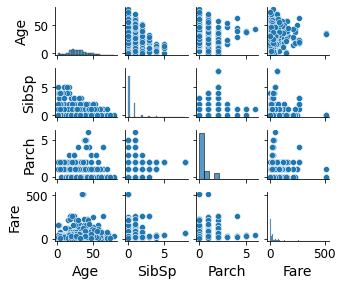

In [24]:
sns.pairplot(df[nums],height=1, aspect=1.2);

- Diagonala bakıldığında Age dışındakiler skewed görünüyor, bunlardan SiSp ve Parch zaten küçük sayılar bi log transformasyona gerek yok ama Fare'de gerekli gibi
- Yine diagonaldakilerin kimisinde outlier da var gibi, boxplotla ayrıca bakarız
- kolonlar arası collinearity yok görünüyor

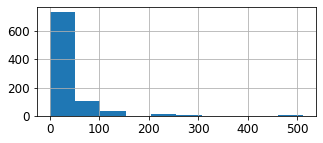

In [25]:
#transformasyon öncesi
df.Fare.hist(figsize=(5,2));

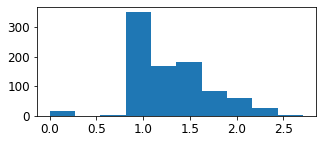

In [26]:
#transformasyon sonrası
plt.figure(figsize=(5,2))
plt.hist(np.log10(df.Fare+1));

Tam normal dağılım olmadı ama yine de scaling için yeterli gibi.

Şimdi de korelasyonlara bakalım, bunun için dython kütüphanesinden faydalanacağız. Zira bu kütüphane ile hem numeric-numeric, hem numeric-kategorik, hem de kategorik-kategorik korelasyonlar tek bi fonksiyonla elde edilebilmektedir.

c:\users\volka\appdata\local\programs\python\python38\lib\site-packages\scikitplot\plotters.py:33: DeprecationWarning: This module was deprecated in version 0.3.0 and its functions are spread throughout different modules. Please check the documentation and update your function calls as soon as possible. This module will be removed in 0.4.0
  warnings.warn("This module was deprecated in version 0.3.0 and its functions "


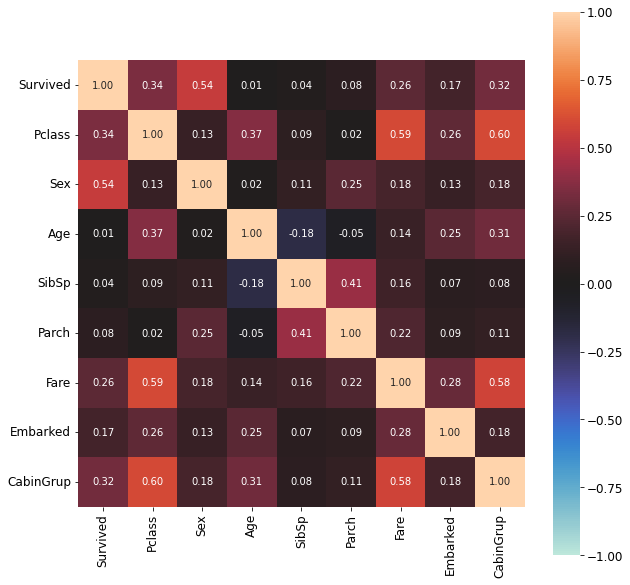

In [27]:
from dython.nominal import associations
corrdict=associations(df,nominal_columns=cats,numerical_columns=nums,figsize=(10,10))

Targetla en yüksek korelasyonu olan kolonlara bakalım

In [28]:
corr_results=corrdict["corr"] #dataframe
da.getHighestPairsOfCorrelation(corr_results,"Survived",5)

Sex          0.540200
Pclass       0.336684
CabinGrup    0.320034
Fare         0.257307
Embarked     0.173099
Name: Survived, dtype: float64

Bu korelasyon değerlerinden feature selection aşamasında yararlanabiliriz.

#### Outliers

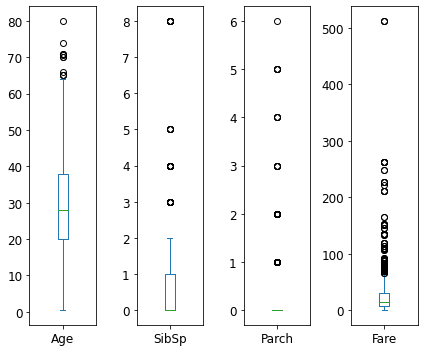

In [29]:
df[nums].plot(kind="box", subplots = True,figsize=(6,5))
plt.tight_layout();

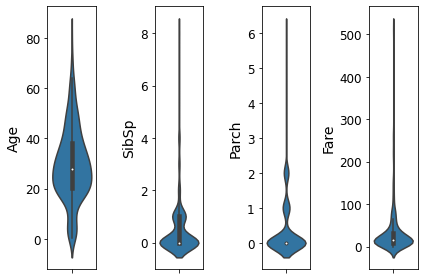

In [30]:
plt.figure(figsize=(6,4))
for e,n in enumerate(nums):
    plt.subplot(1,len(nums),e+1)
    ch=sns.violinplot(y=n, data=df)
plt.tight_layout()    
plt.show();    

In [31]:
da.outlierinfo(df,nums,imputestrategy="None",thresh=0.25)

Age, Min:0.42, Max:80.0, Q1:    20.12, Q3:    38.00, IQR:    17.88, Q3+1,5*IQR:    64.81, Q1-1,5*IQR:    -6.69, Mean within the box:    69.77, Total Mean:    29.70, Outliers:11

SibSp, Min:0, Max:8, Q1:     0.00, Q3:     1.00, IQR:     1.00, Q3+1,5*IQR:     2.50, Q1-1,5*IQR:    -1.50, Mean within the box:     4.37, Total Mean:     0.52, Outliers:46

Parch, Min:0, Max:6, Q1:     0.00, Q3:     0.00, IQR:     0.00, Q3+1,5*IQR:     0.00, Q1-1,5*IQR:     0.00, Mean within the box:     1.60, Total Mean:     0.38, Outliers:213

Fare, Min:0.0, Max:512.3292, Q1:     7.91, Q3:    31.00, IQR:    23.09, Q3+1,5*IQR:    65.63, Q1-1,5*IQR:   -26.72, Mean within the box:   128.29, Total Mean:    32.20, Outliers:116



In [32]:
da.outliers_IQR(df,nums,imputestrategy="None",thresh=0.25)

11 outliers exists in feature 'Age'
46 outliers exists in feature 'SibSp'
213 outliers exists in feature 'Parch'
116 outliers exists in feature 'Fare'


In [33]:
da.outliers_IQR(df,nums,imputestrategy="None",thresh=0.1)

46 outliers exists in feature 'SibSp'
1 outliers exists in feature 'Parch'
20 outliers exists in feature 'Fare'


Evet hepsinde outlier var, özellikle Fare'de. SizSp ve Parch her ne kadar outlier gösterse de bunlar outlier olarak ele alınmamalı, çünkü bunlar kişi sayıs ve çok da bir uç değer yok aslında.

In [34]:
da.outliers_zs(df,nums,imputestrategy="None")

12 outliers exists in feature 'SibSp'
10 outliers exists in feature 'Parch'
17 outliers exists in feature 'Fare'


In [35]:
da.outliers_std(df,nums,imputestrategy="None")

2 outliers exists in feature 'Age'
30 outliers exists in feature 'SibSp'
15 outliers exists in feature 'Parch'
20 outliers exists in feature 'Fare'


Sonuç olarak, thresholdu 0.1 olan IQR yöntemi ile ilerleriz.

#### Null kontrolü

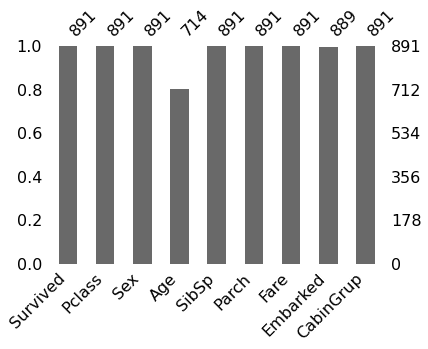

In [36]:
import missingno as msno
msno.bar(df, figsize=(6,4));

c:\users\volka\appdata\local\programs\python\python38\lib\site-packages\missingno\missingno.py:72: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax0.grid(b=False)
c:\users\volka\appdata\local\programs\python\python38\lib\site-packages\missingno\missingno.py:141: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=False)


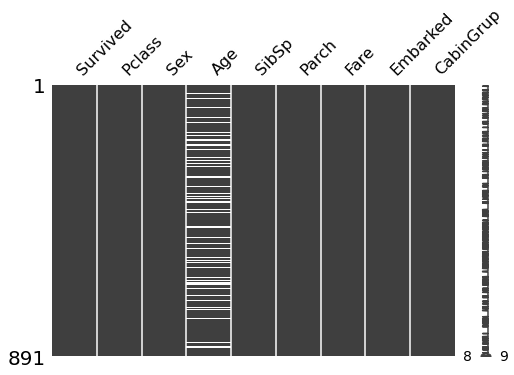

In [41]:
# da.nullPlot(df)
msno.matrix(df,figsize=(8,5));

In [42]:
da.findNullLikeValues(df)

There are no null-like values
Don't forget to check for 0's manually


### Target bazlı analizler

Targetın dağılımına bakalım

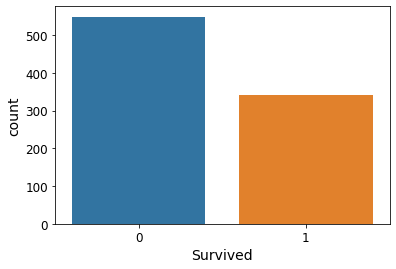

In [43]:
sns.countplot(x=df["Survived"]);

In [44]:
df.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

Çok büyük olmamakla birlikte hafif bir imbalance sözkonusu.

Target bazında numeriklerin ortalama değerlerine bakalım.

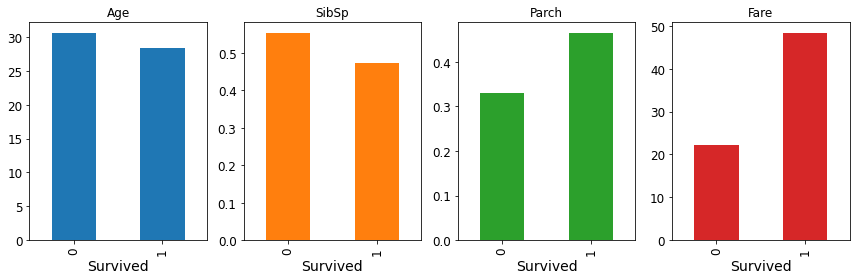

In [45]:
da.plotNumericsByTarget(df,"Survived",nums=nums,layout=(1,4),figsize=(12, 4))

Fare ve Parch, target bazında oldukça farkediyor, bunların feature importance'ı önemli olacak gibi duruyor. Korelasyon analizinde Fare için bu durumu gözlemledmiştik zaten ancak Parch için aynı durum sözkonusu değil. (Outlier varsa sonuçları yorumlayı yanıltabilir, ki Fare'da oldukça büyük outlierlar vardı, o yüzden buraki sonuçlara şuan çok da güvenmemekte fayda var)

Kategorik kolonlar üzerinden baktığımızda ilgili kategorilerdeki her bir değer için Surviving olasılıklarına(prior probability) bakalım.

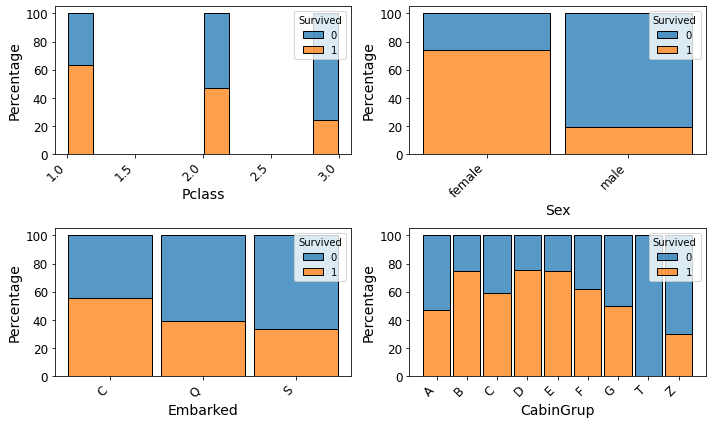

In [46]:
plt.figure(figsize=(10,6))
da.plotTargetByCats(df, cats, "Survived", subplot_tpl=(2,2));

Bu grafikleri şöyle okumak lazım. Öncelikle bunların percentage olduğunu unutmayın:

- 1.sınıflarda hayatta klama olasılığı daha yüksek olmuş
- Kadınlarda hayatta klama olasılığı daha yüksek olmuş
- Cherborugdan binenler daha şanslıymış
- T Cabin grubunda olanların hiçbiri hayatta kalamamış, sonra kabin numarası bilinmeyenler en şanssız iken, B,D ve E gruplarındakiler daha şanslıymış

Şimdi de hayatta kalanların kategoriler bazındaki dağılımına bakalım.

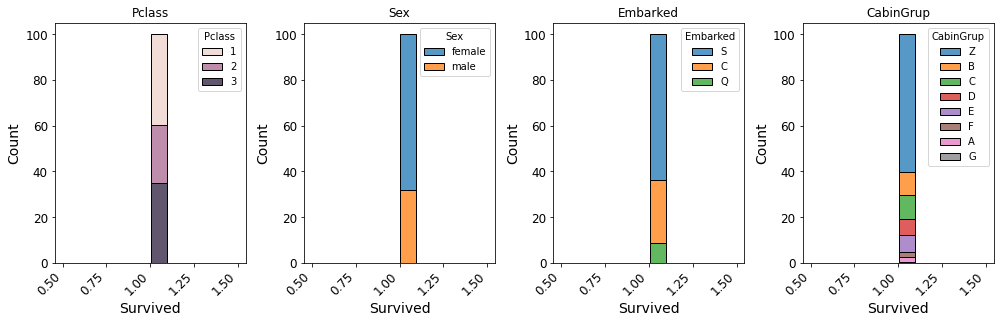

In [47]:
plt.figure(figsize=(14,8))
da.plotPositiveTargetByCats(df, cats, "Survived", subplot_tpl=(2,4),pos_label=1);

Yorumlar

Kurtulanların çoğunluğu;

- Kadın
- Southamptondan binenler 
- Kabin numarası bilinmeyenler

Her bir kategorik feature ve numerik feature çifti için target'ın ortalama değerlerine bakalım.

Plots for Age,
----------------------


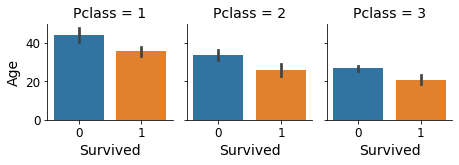

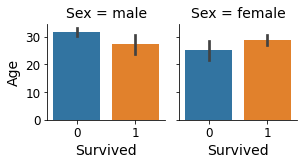

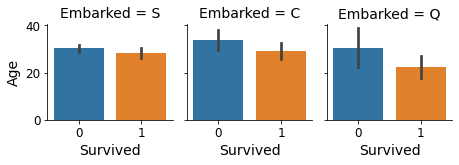

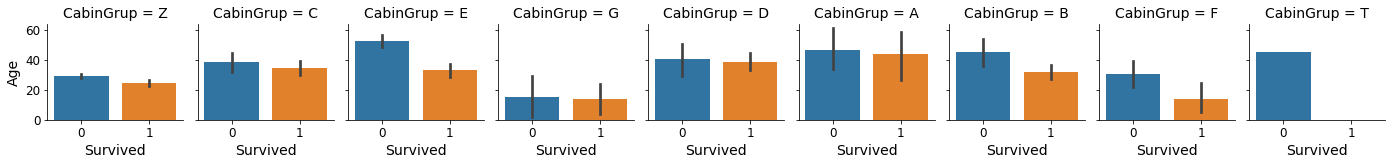

Plots for SibSp,
----------------------


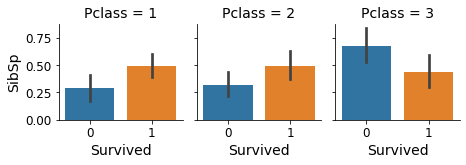

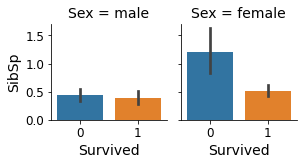

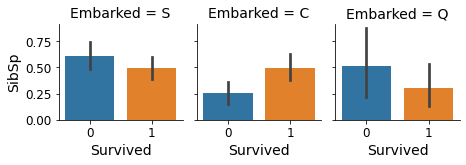

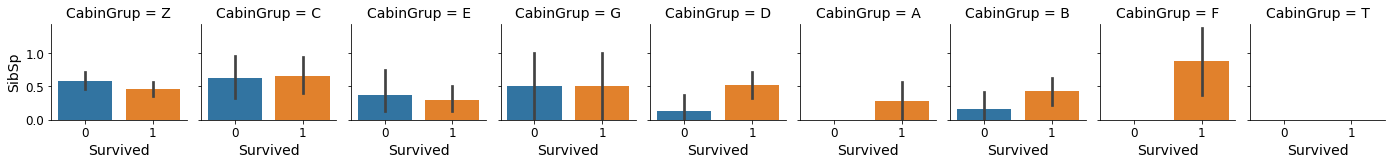

Plots for Parch,
----------------------


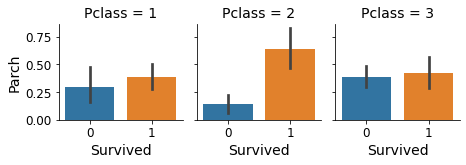

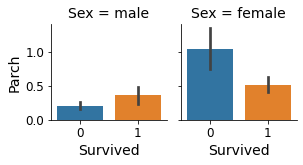

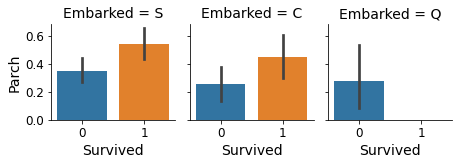

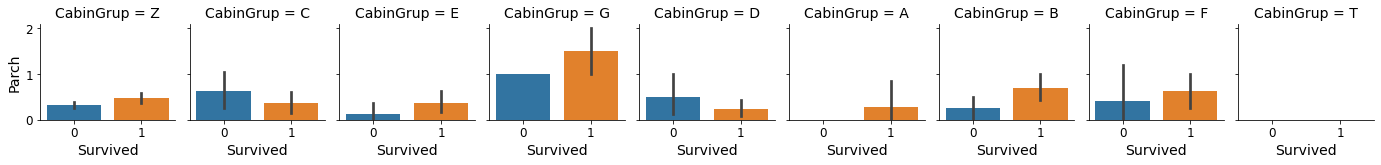

Plots for Fare,
----------------------


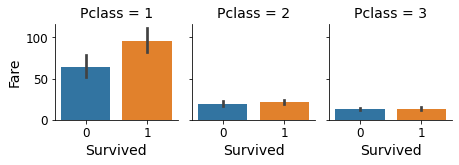

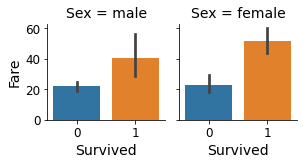

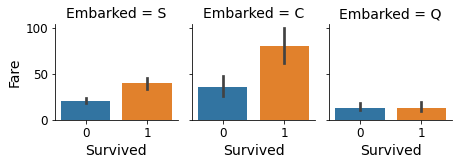

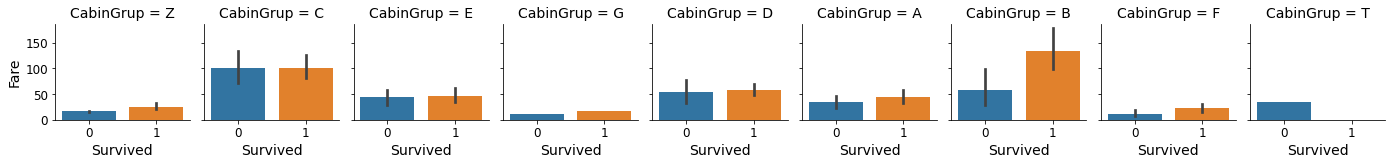

In [48]:
da.plotTargetForNumCatsPairs(df,nums,cats,"Survived",2.4,0.9)

Son olarak da targetın diğer kategoriler bazında ortalama numerik değerlerine bakalım

Plots for Age,
----------------------


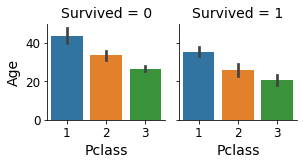

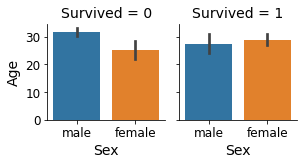

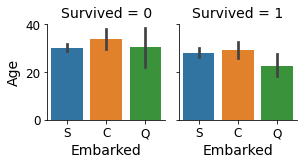

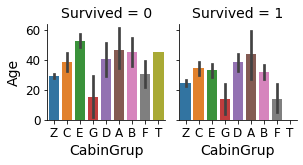

Plots for SibSp,
----------------------


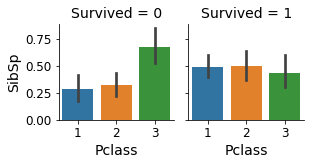

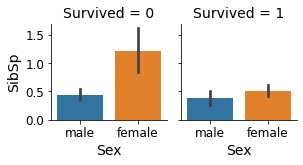

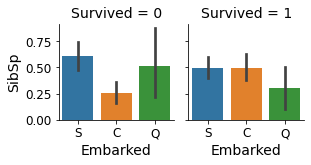

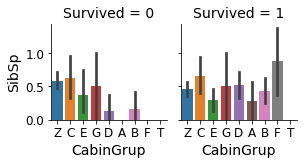

Plots for Parch,
----------------------


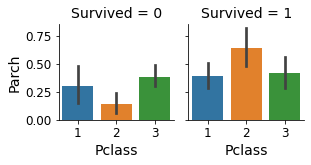

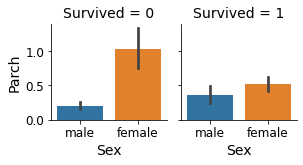

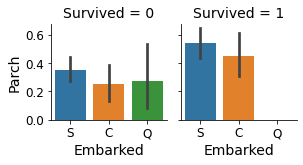

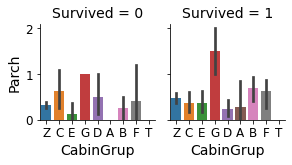

Plots for Fare,
----------------------


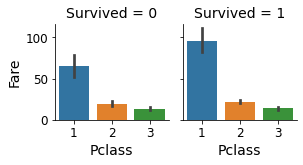

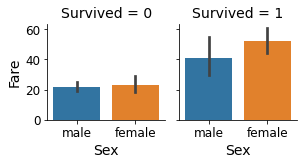

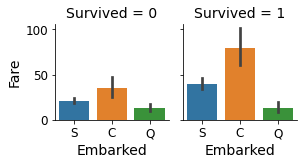

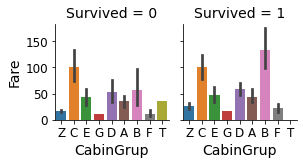

In [49]:
da.plotCategoricForNumTargetPairs(df,nums,cats,"Survived",2.4,0.9)

Bunları yorumlamayı size bırakıyorum.

### Checking for cleaning

In [50]:
#numeric borders, check the min-max
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Age kolonunda min değer biraz garip görünüyor, bu bir bebek olabilir, bakalım yaşı 1den küçük kaç yolcu var

In [51]:
df[df.Age<1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinGrup
78,1,2,male,0.83,0,2,29.0000,S,Z
305,1,1,male,0.92,1,2,151.5500,S,C
469,1,3,female,0.75,2,1,19.2583,C,Z
644,1,3,female,0.75,2,1,19.2583,C,Z
755,1,2,male,0.67,1,1,14.5000,S,Z
803,1,3,male,0.42,0,1,8.5167,C,Z
831,1,2,male,0.83,1,1,18.7500,S,Z


Bunların hepsini bebek gibi düşünebiliriz, ve belki de outlier capping yapıp yaşı 2'den küçük tüm çocukları 2 yapabilriiz.

yukarıda low-cardinalitysi olan featureların unique valuelarına tekrar bakalım, anormal bir değer var mı, görelim. (Yok)

### Diğer işlemler

In [52]:
#duplicate check for rows
len(df)-len(df.duplicated(keep=False))

0

In [53]:
#duplicate check for columns
len(set(df.columns))-len(df.columns)

0

In [54]:
#multicollinearty check->remove one if r>0.9
corr_results[corr_results>0.9]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinGrup
Survived,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pclass,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Age,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
SibSp,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Parch,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Fare,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Embarked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
CabinGrup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [55]:
#data quality to peculiar to this specific data
len(df[df.Parch<df.SibSp]) #mesela Parch her zaman SibSp'den büyük olmalı denseydi şu kontrolü yapabilirdik

192

In [56]:
# any need for conversion, 100 USD-->100
#yok

In [57]:
#check for feature extraction
#bunu Cabin için zaten yaptık, pipelinea da eklemeyi unutmayalım

## Varsayımların kontrolü

Çok kritik varsayımlar olmadığı ve genel kullanılan bi dataseti olduğu için pas geçiyorum.

## Preparing X,y and train-test splits

In [58]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinGrup
0,0,3,male,22.0,1,0,7.2500,S,Z
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,Z
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,Z


In [59]:
X=df.iloc[:,1:]
y=df.iloc[:,0].values

In [60]:
#if imbalanced add stratify=y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42,stratify=y)

In [61]:
list(map(np.shape, (X_train, X_test, y_train, y_test)))

[(668, 8), (223, 8), (668,), (223,)]

In [62]:
list(map(type, (X_train, X_test, y_train, y_test)))

[pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 numpy.ndarray,
 numpy.ndarray]

## Modelleme

Logistic Regression ile birlikte benzer mantıkta çalışan birkaç classfiera daha bakacağız.

In [63]:
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier

Diğer ikisini kısaca tanıyalım:

**Lasso**

LinReg notebookunda detay bilgi var, <a href="https://machinelearningmastery.com/lasso-regression-with-python/">şuraya</a> da bakabilirsiniz. Burda belirtildiği gibi Lasso, en küçük kareler problemini L1 cezasıyla(penaltı) optimize eder. Tanım olarak, Lasso ile bir lojistik fonksiyonu optimize edemezsiniz. L1 cezalı bir lojistik fonksiyonu optimize etmek istiyorsanız, L1 parametreli LogReg modeli kullanabilirsiniz. Yani özetle, LinReg'de olduğunun aksine Lasso sınıfnı kullanmayacağız, bunun için penalty parametresini kullanacağız.

**RidgeClassifer**

Bu da L2 penaltısı kullanır, LogReg'den daha hızlı.

**SGDClassifier**

SGD, ayrı bi tahminleme algoritması değil, bir optimizasyon yöntemidir. Lineer regresyon notebookunda bunu incelemiştik. SGDClassifer, sklearn içinde her ne kadar ayrı bir algoritmaymış gibi tutulmuş olsa da aslında bu optimizasyon yöntemi olarak SGD uygulayan lineer bir classifierdır. Burda loss="log_loss dediğimizde aslında optimizer olarak OLS değil de SGD kullanan bir LogReg eğitmiş oluruz.(log-loss yerine hinge kullanılırsa da bu sefer SVM eğitilmiş olur)

Özellikle sample sayısı çokken, yani large data sözkonusu iken işe yarar, hem RAM hem cpu açısından daha verimli.

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
- https://scikit-learn.org/stable/modules/sgd.html#sgd

### Model selection

#### hyperparametreler

LogReg'in birçok hyperparametresi var ancak eğitimlerde çoğunlukla 1-2 tanesi üzerinde durulup geçilir. Ben öyle yapmanızı tavsiye etmiyorum. Buraya da copy paste yapmanın bi anlamı yok, dokümantasyonundan lütfen her parametrenin ne olduğuna, hangisinin neyle birlikte kullanılması gerektiğine bakın. Bunları doğru yapmazsanız ya eğitimlerde yüzeysel anlatıldığı gibi basit bir gridsearch yapmış olursunuz ve bu da muhtemelen yetersiz kalır, çünkü tüm olası seçenekleri denememiş olursunuz, ya da herşeyi birlikte denemeye çalışıp hatalar alırsınız, çünkü her parametrenin her değeri birbiriyle uyumlu değil. O yüzden birbiriyle uyumlu olacak geniş bir parametre uzayını denemek için bunlara hakim olmanız gerekir.

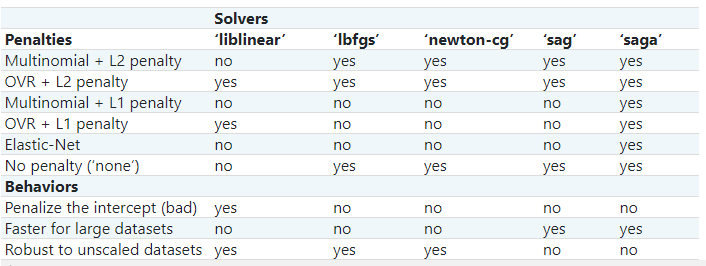

https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

Solverlar(oppitmizerlar) hakkında detaylı bilgiyi <a href="https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-definitions">buradan</a> ve <a href="https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451">buradan</a> elde edebilrsiniz.

#### Pipeline

Şimdi yavaştan pipelinımızı kurmaya başlayalım. Öncelikle outlierhandlerımız olan custom class tanımımızı yapalım.

In [64]:
from sklearn.base import BaseEstimator, TransformerMixin

def logTransformer(df,col_name):    
    temp=df.copy() #her defasında orjinal X_train bozulmasın diye, yoksa gridi 2.kez çalıştırdığımda hata alıyoruz
    temp[col_name] = np.log10(temp[col_name]+0.01)
    return temp
   
class OutlierHandler(BaseEstimator, TransformerMixin):
    def __init__(self, featureindices): #if only specific columns to be processed
        self.featureindices = featureindices
  
    def fit(self, X:np.array, y = None):
        Q1s = np.quantile(X[:,self.featureindices],0.1,axis=0)
        Q3s = np.quantile(X[:,self.featureindices],0.9,axis=0)
        IQRs = Q3s-Q1s
        self.top=(Q3s + 1.5 * IQRs)
        self.bottom=(Q1s - 1.5 * IQRs)
        return self 
    
    def transform(self, X:np.array, y = None ):
        X[:,self.featureindices]=np.where(X[:,self.featureindices]>self.top,self.top,X[:,self.featureindices])
        X[:,self.featureindices]=np.where(X[:,self.featureindices]<self.bottom,self.bottom,X[:,self.featureindices])
        return X

parametergrid içinde kullanılacak bazı variableları tanımlayalım.

In [65]:
c_range=np.logspace(4,-5, num=10) #ilk run'da ideal noktayı bulacağız. iknci run'da idealin etrafında daraltma yapacağız
weights = np.arange(2,11,2)
min_res=50
fact=3
mi=4000 #max_iter for LogReg

ve tüm pipelınımız da şöyle olur

In [66]:
%%time
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.base import BaseEstimator, TransformerMixin

np.random.seed(42) #RandomizedSearchCV için

class DummyTransformer(TransformerMixin,BaseEstimator):
    def fit(self,X,y=None): pass
    def transform(self,X,y=None): pass
    
class DummyEstimator(BaseEstimator):
    def fit(self,X,y=None): pass
    def score(self,X,y=None): pass    
    
cat_pipe=Pipeline([ 
                   ("ohe", OneHotEncoder(drop="first",handle_unknown='ignore'))     
                  ])

num_pipe=Pipeline([
                   ("imp", SimpleImputer(strategy="median")),     
                   ("ouh", DummyTransformer()), 
                   ("scl", DummyTransformer())
                  ])


coltrans = ColumnTransformer([
                                ('nominals',  cat_pipe, [e for e,v in enumerate(X.columns) if v in noms]),
                                ('numerics',  num_pipe, [e for e,v in enumerate(X.columns) if v in nums])
                                 ],n_jobs=-1,remainder="passthrough") #ordinaller


pipe = Pipeline(steps=[('log', FunctionTransformer(logTransformer,kw_args=dict(col_name="Fare"))),
                       ('ct', coltrans),
                       ('fs', SelectKBest(score_func=mutual_info_classif,k=10)),
                       ('clf', DummyEstimator()) 
                       ])

params = [          
          {
           'clf'         : [LogisticRegression(max_iter=mi,random_state=42)],
           'clf__C'      : c_range, 
           'clf__tol'      :[0.001, 0.0001], 
           'clf__penalty': ['l2'], #none koymadım, çünkü zaten yüksek C değeri de veriyorum ki bu zaten regularizasyon uygulama demekle aynı şey
           'clf__solver' : ['newton-cg', 'lbfgs','sag','saga'],
           'clf__class_weight': [{0:1, 1:x} for x in weights] + ['balanced'],
           'ct__numerics__ouh': [OutlierHandler(featureindices=[0,3]),None], #Age ve Fare için, her ne kadar Fare'de LogTrans yapmış olsak da
           'ct__numerics__scl': [StandardScaler(),MinMaxScaler()]
          } ,
          {
           'clf'         : [LogisticRegression(max_iter=mi,random_state=42)],
           'clf__C'      : c_range, 
           'clf__tol'      :[0.000, 0.0001],               
           'clf__penalty': ['l1'], 
           'clf__solver' : ['liblinear','saga'],
           'clf__class_weight': [{0:1, 1:x} for x in weights] + ['balanced'],                
           'ct__numerics__ouh': [OutlierHandler(featureindices=[0,3]),None], #Age ve Fare için, her ne kadar Fare'de LogTrans yapmış olsak da
           'ct__numerics__scl': [StandardScaler(),MinMaxScaler()]
          } ,    
          {
           'clf'         : [LogisticRegression(max_iter=mi,random_state=42)],
           'clf__C'      : c_range, 
           'clf__tol'      :[0.001, 0.0001],                             
           'clf__penalty': ['elasticnet'], 
           'clf__l1_ratio':[0.15, 0.5, 1],
           'clf__solver' : ['saga'],
           'clf__class_weight': [{0:1, 1:x} for x in weights] + ['balanced'],              
           'ct__numerics__ouh': [OutlierHandler(featureindices=[0,3]),None], #Age ve Fare için, her ne kadar Fare'de LogTrans yapmış olsak da
           'ct__numerics__scl': [StandardScaler(),MinMaxScaler()]
          } ,        
          {
           'clf'               : [SGDClassifier(loss='log_loss',max_iter=mi,random_state=42)],
           'clf__alpha'        : c_range, 
           'clf__tol'          : [0.001, 0.0001],                             
           'clf__penalty'      : ['l1','l2','elasticnet'],    
           'clf__l1_ratio'     : [0.15, 0.5, 1],   
           'clf__learning_rate': ['constant','optimal','invscaling','adaptive'],
           'clf__eta0'          : [0.01, 0.001, 0.0001],    
           'clf__early_stopping':[True,False], 
           'clf__class_weight': [{0:1, 1:x} for x in weights] + ['balanced'],                
           'ct__numerics__ouh': [OutlierHandler(featureindices=[0,3]),None], #Age ve Fare için, her ne kadar Fare'de LogTrans yapmış olsak da
           'ct__numerics__scl' : [StandardScaler(),MinMaxScaler()]
          } ,  
          {
           'clf'              : [RidgeClassifier(random_state=42)],
           'clf__alpha'       : c_range, 
           'clf__tol'         :[0.001, 0.0001],            
           'clf__solver'      : ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
           'clf__class_weight': [{0:1, 1:x} for x in weights] + ['balanced'],                
           'ct__numerics__ouh': [OutlierHandler(featureindices=[0,3]),None], #Age ve Fare için, her ne kadar Fare'de LogTrans yapmış olsak da
           'ct__numerics__scl': [StandardScaler(),MinMaxScaler()]
          }    
         ]         

mycv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
hrs1 = HalvingRandomSearchCV(estimator = pipe, param_distributions = params, cv = mycv, n_jobs=-1, verbose = 1, 
                           scoring = 'accuracy',error_score='raise',min_resources=min_res,factor=fact) 
hrs1.fit(X_train, y_train)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 50
max_resources_: 668
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 13
n_resources: 50
Fitting 50 folds for each of 13 candidates, totalling 650 fits
----------
iter: 1
n_candidates: 5
n_resources: 150
Fitting 50 folds for each of 5 candidates, totalling 250 fits
----------
iter: 2
n_candidates: 2
n_resources: 450
Fitting 50 folds for each of 2 candidates, totalling 100 fits
Wall time: 1min 49s


HalvingRandomSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=1),
                      error_score='raise',
                      estimator=Pipeline(steps=[('log',
                                                 FunctionTransformer(func=<function logTransformer at 0x000001BC2B98CE50>,
                                                                     kw_args={'col_name': 'Fare'})),
                                                ('ct',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   remainder='passthrough',
                                                                   transformers=[('nominals',
                                                                                  Pipeline(steps=[('ohe',
                                                                                                   OneHotEncod...
                                            'clf__alpha': array([1.e+04, 1.e+03, 1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03,
       1.e-04, 1.e-05]),
                                            'clf__class_weight': [{0: 1, 1: 2},
                                                                  {0: 1, 1: 4},
                                                                  {0: 1, 1: 6},
                                                                  {0: 1, 1: 8},
                                                                  {0: 1, 1: 10},
                                                                  'balanced'],
                                            'clf__solver': ['svd', 'cholesky',
                                                            'lsqr', 'sparse_cg',
                                                            'sag', 'saga'],
                                            'clf__tol': [0.001, 0.0001],
                                            'ct__numerics__ouh': [OutlierHandler(featureindices=[0,
                                                                                                 3]),
                                                                  None],
                                            'ct__numerics__scl': [StandardScaler(),
                                                                  MinMaxScaler()]}],
                      scoring='accuracy', verbose=1)

In [67]:
ml.gridsearch_to_df(hrs1,5)    

,param_ct__numerics__scl,param_ct__numerics__ouh,param_clf__tol,param_clf__penalty,param_clf__learning_rate,param_clf__l1_ratio,param_clf__eta0,param_clf__early_stopping,param_clf__class_weight,param_clf__alpha,param_clf,param_clf__solver,param_clf__C,mean_test_score,std_test_score
19,StandardScaler(),"OutlierHandler(featureindices=[0, 3])",0.0001,NaN,NaN,NaN,NaN,NaN,balanced,0.001,"RidgeClassifier(alpha=0.001, class_weight='balanced', random_state=42,\n solver='cholesky', tol=0.0001)",cholesky,NaN,0.791129,0.039551
17,StandardScaler(),"OutlierHandler(featureindices=[0, 3])",0.0001,NaN,NaN,NaN,NaN,NaN,balanced,0.001,"RidgeClassifier(alpha=0.001, class_weight='balanced', random_state=42,\n solver='cholesky', tol=0.0001)",cholesky,NaN,0.772713,0.075316
18,StandardScaler(),"OutlierHandler(featureindices=[0, 3])",0.0001,elasticnet,constant,1,0.0001,False,balanced,0.01,"SGDClassifier(loss='log_loss', max_iter=4000, random_state=42)",NaN,NaN,0.760350,0.047239
3,StandardScaler(),"OutlierHandler(featureindices=[0, 3])",0.0001,NaN,NaN,NaN,NaN,NaN,balanced,0.001,"RidgeClassifier(alpha=0.001, class_weight='balanced', random_state=42,\n solver='cholesky', tol=0.0001)",cholesky,NaN,0.740222,0.135790
16,StandardScaler(),"OutlierHandler(featureindices=[0, 3])",0.0001,elasticnet,constant,1,0.0001,False,balanced,0.01,"SGDClassifier(loss='log_loss', max_iter=4000, random_state=42)",NaN,NaN,0.733218,0.076966


In [68]:
ml.compareEstimatorsInGridSearch(hrs1,tableorplot='table')

,MAX of mean_test_score,MIN of mean_fit_time
param_clf,,
RidgeClassifier,0.791129,0.370013
SGDClassifier,0.760350,0.311823
LogisticRegression,0.646000,0.358652


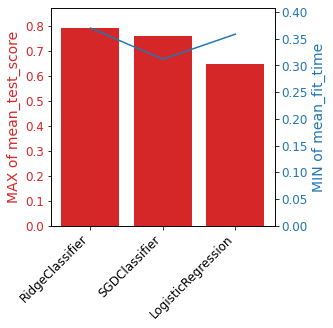

In [69]:
ml.compareEstimatorsInGridSearch(hrs1,tableorplot='plot',figsize=(4,4))        

Normal veya halving gridsearch yapsaydık 5664000 adet model çalışacaktı, bunu local makinede yapmak imkansız gibi. Peki halvingsiz normal randomsearch yapsak, ne kadar sürerdi ona bakalım, bi de skorumuz çok farkediyor mu, yani halvingrandom çalışıtırmak değmiş mi görelim,

In [70]:
%%time
from sklearn.model_selection import RandomizedSearchCV
rs1 = RandomizedSearchCV(estimator=pipe, param_distributions = params, cv = mycv, n_jobs=-1, verbose = 1, 
                          scoring = 'accuracy',error_score='raise',n_iter=100)
rs1.fit(X_train, y_train)

Fitting 50 folds for each of 100 candidates, totalling 5000 fits
Wall time: 9min 42s


RandomizedSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=1),
                   error_score='raise',
                   estimator=Pipeline(steps=[('log',
                                              FunctionTransformer(func=<function logTransformer at 0x000001BC2B98CE50>,
                                                                  kw_args={'col_name': 'Fare'})),
                                             ('ct',
                                              ColumnTransformer(n_jobs=-1,
                                                                remainder='passthrough',
                                                                transformers=[('nominals',
                                                                               Pipeline(steps=[('ohe',
                                                                                                OneHotEncoder(...
                                         'clf__alpha': array([1.e+04, 1.e+03, 1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03,
       1.e-04, 1.e-05]),
                                         'clf__class_weight': [{0: 1, 1: 2},
                                                               {0: 1, 1: 4},
                                                               {0: 1, 1: 6},
                                                               {0: 1, 1: 8},
                                                               {0: 1, 1: 10},
                                                               'balanced'],
                                         'clf__solver': ['svd', 'cholesky',
                                                         'lsqr', 'sparse_cg',
                                                         'sag', 'saga'],
                                         'clf__tol': [0.001, 0.0001],
                                         'ct__numerics__ouh': [OutlierHandler(featureindices=[0,
                                                                                              3]),
                                                               None],
                                         'ct__numerics__scl': [StandardScaler(),
                                                               MinMaxScaler()]}],
                   scoring='accuracy', verbose=1)

In [71]:
ml.gridsearch_to_df(rs1,5)    

,param_ct__numerics__scl,param_ct__numerics__ouh,param_clf__tol,param_clf__solver,param_clf__class_weight,param_clf__alpha,param_clf,param_clf__penalty,param_clf__learning_rate,param_clf__l1_ratio,param_clf__eta0,param_clf__early_stopping,param_clf__C,mean_test_score,std_test_score
73,MinMaxScaler(),None,0.0001,newton-cg,balanced,NaN,"LogisticRegression(C=1000.0, class_weight='balanced', max_iter=4000,\n random_state=42, solver='newton-cg')",l2,NaN,NaN,NaN,NaN,1000.0,0.788803,0.031984
92,StandardScaler(),None,0.001,NaN,balanced,0.001,"SGDClassifier(loss='log_loss', max_iter=4000, random_state=42)",l1,adaptive,0.5,0.01,False,NaN,0.788043,0.033164
51,MinMaxScaler(),None,0.0001,NaN,balanced,0.01,"SGDClassifier(loss='log_loss', max_iter=4000, random_state=42)",l1,adaptive,0.15,0.01,False,NaN,0.786998,0.028790
48,MinMaxScaler(),None,0.0001,NaN,"{0: 1, 1: 2}",0.00001,"SGDClassifier(loss='log_loss', max_iter=4000, random_state=42)",l1,invscaling,0.5,0.01,False,NaN,0.784904,0.030160
61,MinMaxScaler(),"OutlierHandler(featureindices=[0, 3])",0.001,NaN,balanced,0.01,"SGDClassifier(loss='log_loss', max_iter=4000, random_state=42)",l2,adaptive,0.15,0.01,False,NaN,0.784457,0.030083


In [72]:
ml.compareEstimatorsInGridSearch(rs1,tableorplot='table')

,MAX of mean_test_score,MIN of mean_fit_time
param_clf,,
LogisticRegression,0.788803,0.633601
SGDClassifier,0.788043,0.548365
RidgeClassifier,0.407925,1.017728


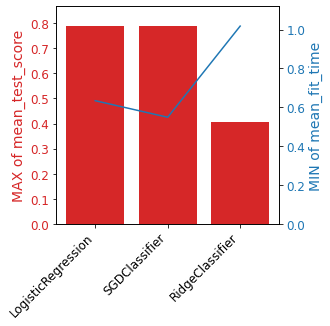

In [73]:
ml.compareEstimatorsInGridSearch(rs1,tableorplot='plot',figsize=(4,4))        

4 puanlık bir kaybımız olmuş(notebook her çalışıtğında burdaki değer de değişecektir), o yüzden halvingli versiyon süre açısından faydalı olurken performans açısından faydalı olmadı. Ama şimdi şunu yapabiliriz. rs1'in sonuçlarına bakıp rakamsal parametrelerden en iyi olanların yeni değer uzayını daraltıp şimdi bu sefer halvingliyi kullanabiliriz.

In [74]:
%%time
params= [
    {
           'clf'               : [SGDClassifier(loss='log_loss',max_iter=mi,random_state=42)],
           'clf__alpha'        : [0.005, 0.01, 0.02, 0.05], 
           'clf__tol'          : [0.0005, 0.001,0.002,0.005],                             
           'clf__penalty'      : ['l1','l2','elasticnet'],    
           'clf__l1_ratio'     : [0.9, 1],   
           'clf__learning_rate': ['constant','optimal','invscaling','adaptive'],
           'clf__eta0'          : [0.0005, 0.001, 0.002, 0.005],    
           'clf__early_stopping':[True,False], 
           'clf__class_weight': ['balanced'],                
           'ct__numerics__ouh': [OutlierHandler(featureindices=[0,3]),None], #Age ve Fare için, her ne kadar Fare'de LogTrans yapmış olsak da
           'ct__numerics__scl' : [StandardScaler(),MinMaxScaler()]
          }   
] 

hrs2 = HalvingRandomSearchCV(estimator = pipe, param_distributions = params, cv = mycv, n_jobs=-1, verbose = 1, 
                           scoring = 'accuracy',error_score='raise',min_resources=min_res,factor=fact) 

hrs2.fit(X_train, y_train)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 50
max_resources_: 668
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 13
n_resources: 50
Fitting 50 folds for each of 13 candidates, totalling 650 fits
----------
iter: 1
n_candidates: 5
n_resources: 150
Fitting 50 folds for each of 5 candidates, totalling 250 fits
----------
iter: 2
n_candidates: 2
n_resources: 450
Fitting 50 folds for each of 2 candidates, totalling 100 fits
Wall time: 1min 38s


HalvingRandomSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=1),
                      error_score='raise',
                      estimator=Pipeline(steps=[('log',
                                                 FunctionTransformer(func=<function logTransformer at 0x000001BC2B98CE50>,
                                                                     kw_args={'col_name': 'Fare'})),
                                                ('ct',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   remainder='passthrough',
                                                                   transformers=[('nominals',
                                                                                  Pipeline(steps=[('ohe',
                                                                                                   OneHotEncod...
                                            'clf__eta0': [0.0005, 0.001, 0.002,
                                                          0.005],
                                            'clf__l1_ratio': [0.9, 1],
                                            'clf__learning_rate': ['constant',
                                                                   'optimal',
                                                                   'invscaling',
                                                                   'adaptive'],
                                            'clf__penalty': ['l1', 'l2',
                                                             'elasticnet'],
                                            'clf__tol': [0.0005, 0.001, 0.002,
                                                         0.005],
                                            'ct__numerics__ouh': [OutlierHandler(featureindices=[0,
                                                                                                 3]),
                                                                  None],
                                            'ct__numerics__scl': [StandardScaler(),
                                                                  MinMaxScaler()]}],
                      scoring='accuracy', verbose=1)

In [75]:
hrs2.best_score_

0.7899675405742821

Çok da işe yaramadı, ilk buluduğmuz sonuçlar daha iyiydi, belki birkaç kez çalıştırmak gerekebilir. Bununla birlikte "titanic logistic regression" diye bir google araması yaparsanız zaten çoğu kişin %80 civarı bir accuracy bulduğunu görürsünüz. Başka neler yapılarak skor iyileştirilebilir:

- kişilerin ismindeki Mr., Mrs gibi ünvanlar çıkartılabilir
- yukarda söylediğimiz ama yapmadığımız, age için minimum yaş olarak 2 belirlenebilir, hatta age alanı belki discretize edilebilir
- fare featuru da discretize edilebilir
- age alanının simpleimputer yapmak yerine, iterativeimputer yapılabilir. yukarıdaki pipelineımız bunu destekler nitelikte, orada aynı işlem için istediğimiz kadar transformer kullanabiliyoruz(scalerlarda yaptığmız gibi)
- ve şuan aklıma gelmeyen, sizin aklınıza gelebilecek diğer yöntemler

### Model değerlendirme(evaluation)

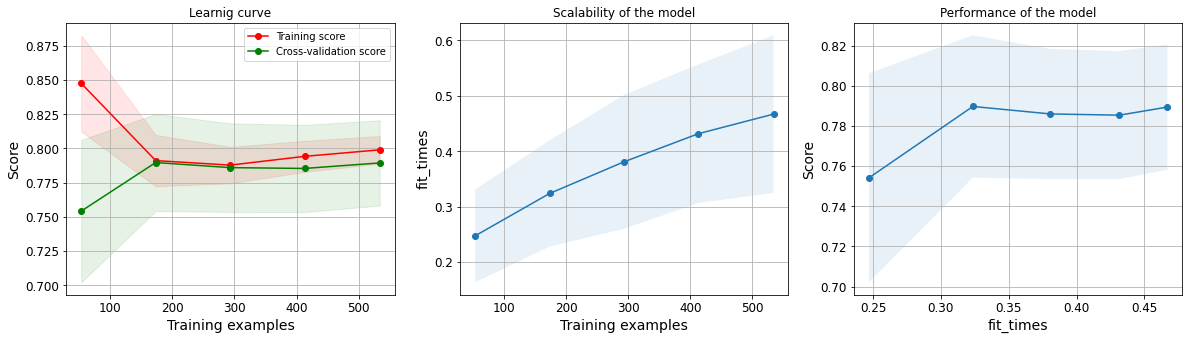

In [76]:
ml.plot_learning_curve(rs1.best_estimator_,"Learnig curve",X_train,y_train,cv=mycv)

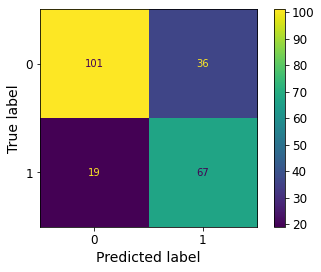

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred=rs1.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm,display_labels=rs1.classes_).plot();

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79       137
           1       0.65      0.78      0.71        86

    accuracy                           0.75       223
   macro avg       0.75      0.76      0.75       223
weighted avg       0.77      0.75      0.76       223



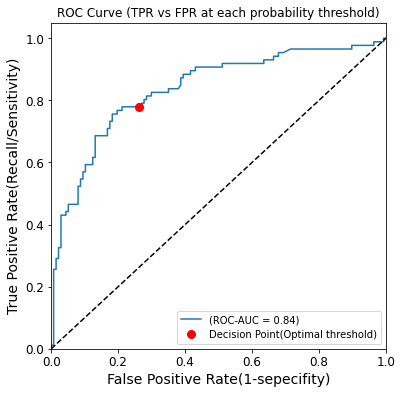

In [79]:
#if not imbalanced
ml.plotROC(y_test, X_test, rs1, pos_label=1)

Eğer olur da best_estimator'ün predict_proba metodu yoksa(mesela RidgeClasffier), o zaman bir başkasına bakabiliriz.

In [ ]:
# rs1.set_params(**ml.getAnotherEstimatorFromGridSearch(rs1,"SGDClassifier")[0]).fit(X_train,y_train)

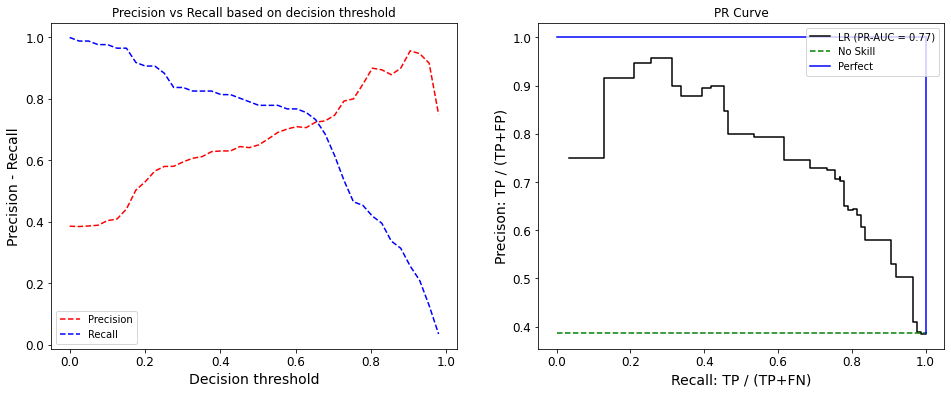

In [80]:
ml.plot_precision_recall_curve(y_test,X_test,rs1)

c:\users\volka\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


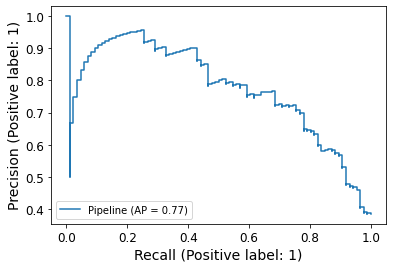

In [81]:
from sklearn.metrics import plot_precision_recall_curve, PrecisionRecallDisplay
plot_precision_recall_curve(rs1.best_estimator_,X_test,y_test)

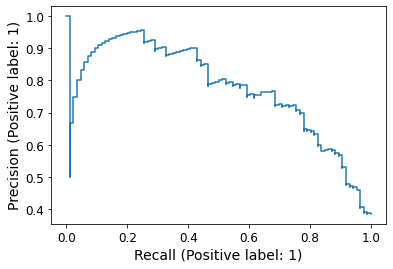

In [82]:
pred_prob = rs1.best_estimator_.predict_proba(X_test) 
precision, recall, thresholds = precision_recall_curve(y_test, pred_prob[:,1])
PrecisionRecallDisplay(precision, recall,pos_label=1).plot()

,Decile,Number of Cases,Number of Responses,Cumulative Responses,% of Events,Gain,lift
0,1,23,22,22,25.58,25.58,2.56
1,2,22,16,38,18.60,44.18,2.21
2,3,22,13,51,15.12,59.30,1.98
3,4,22,13,64,15.12,74.42,1.86
4,5,22,6,70,6.98,81.40,1.63
5,6,23,7,77,8.14,89.54,1.49
6,7,22,2,79,2.33,91.87,1.31
7,8,21,3,82,3.49,95.36,1.19
8,9,23,1,83,1.16,96.52,1.07
9,10,23,3,86,3.49,100.01,1.00


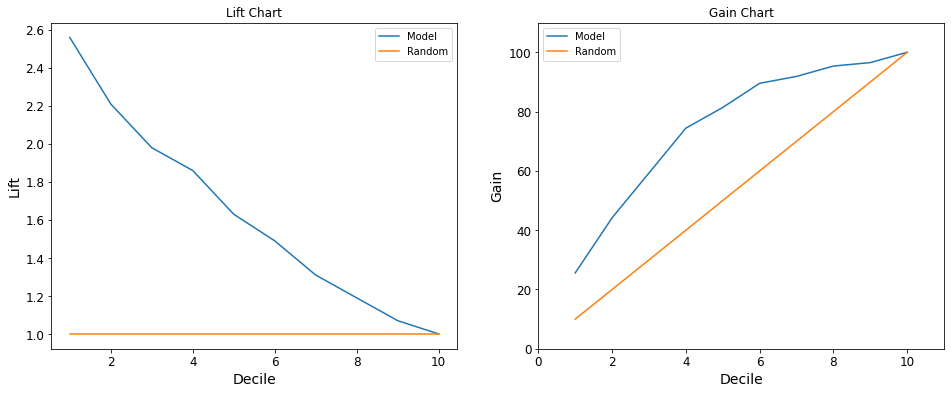

In [83]:
ml.plot_gain_and_lift(rs1,X_test,y_test,pos_label=1)

Yukarıda ne demiştik, eğer business bizden en güvenilir modeli kurmamızı istiyorsa o zaman accuracy yerine belki log_loss'a bakmayı isteyebiliriz demiştik.

Şimdi direkt en düşük log-loss'u elde etmeyi hedefleyecek şekilde modelimizi kuralım(scoring'e neg_log_loss vereceğiz)

In [85]:
%%time
params= [
    {
           'clf'               : [SGDClassifier(loss='log_loss',max_iter=mi,random_state=42)],
           'clf__alpha'        : [0.005, 0.01, 0.02, 0.05], 
           'clf__tol'          : [0.0005, 0.001,0.002,0.005],                             
           'clf__penalty'      : ['l1','l2','elasticnet'],    
           'clf__l1_ratio'     : [0.9, 1],   
           'clf__learning_rate': ['constant','optimal','invscaling','adaptive'],
           'clf__eta0'          : [0.0005, 0.001, 0.002, 0.005],    
           'clf__early_stopping':[True,False], 
           'clf__class_weight': ['balanced'],                
           'ct__numerics__ouh': [OutlierHandler(featureindices=[0,3]),None], #Age ve Fare için, her ne kadar Fare'de LogTrans yapmış olsak da
           'ct__numerics__scl' : [StandardScaler(),MinMaxScaler()]
          }   
] 

rs_logloss = RandomizedSearchCV(estimator=pipe, param_distributions = params, cv = mycv, n_jobs=-1, verbose = 1, 
                          scoring = 'neg_log_loss',error_score='raise',n_iter=100)
rs_logloss.fit(X_train, y_train)

Fitting 50 folds for each of 100 candidates, totalling 5000 fits
Wall time: 8min 50s


RandomizedSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=1),
                   error_score='raise',
                   estimator=Pipeline(steps=[('log',
                                              FunctionTransformer(func=<function logTransformer at 0x000001BC2B98CE50>,
                                                                  kw_args={'col_name': 'Fare'})),
                                             ('ct',
                                              ColumnTransformer(n_jobs=-1,
                                                                remainder='passthrough',
                                                                transformers=[('nominals',
                                                                               Pipeline(steps=[('ohe',
                                                                                                OneHotEncoder(...
                                         'clf__eta0': [0.0005, 0.001, 0.002,
                                                       0.005],
                                         'clf__l1_ratio': [0.9, 1],
                                         'clf__learning_rate': ['constant',
                                                                'optimal',
                                                                'invscaling',
                                                                'adaptive'],
                                         'clf__penalty': ['l1', 'l2',
                                                          'elasticnet'],
                                         'clf__tol': [0.0005, 0.001, 0.002,
                                                      0.005],
                                         'ct__numerics__ouh': [OutlierHandler(featureindices=[0,
                                                                                              3]),
                                                               None],
                                         'ct__numerics__scl': [StandardScaler(),
                                                               MinMaxScaler()]}],
                   scoring='neg_log_loss', verbose=1)

In [86]:
ml.gridsearch_to_df(rs_logloss)

,param_ct__numerics__scl,param_ct__numerics__ouh,param_clf__tol,param_clf__penalty,param_clf__learning_rate,param_clf__l1_ratio,param_clf__eta0,param_clf__early_stopping,param_clf__class_weight,param_clf__alpha,param_clf,mean_test_score,std_test_score
99,StandardScaler(),"OutlierHandler(featureindices=[0, 3])",0.001,elasticnet,optimal,0.9,0.0005,False,balanced,0.005,"SGDClassifier(alpha=0.005, class_weight='balanced', eta0=0.0005, l1_ratio=0.9,\n loss='log_loss', max_iter=4000, penalty='elasticnet',\n random_state=42)",-0.455551,0.045144
3,StandardScaler(),None,0.0005,elasticnet,optimal,1,0.001,False,balanced,0.005,"SGDClassifier(alpha=0.005, class_weight='balanced', eta0=0.0005, l1_ratio=0.9,\n loss='log_loss', max_iter=4000, penalty='elasticnet',\n random_state=42)",-0.458206,0.042674
40,MinMaxScaler(),None,0.001,elasticnet,optimal,0.9,0.001,False,balanced,0.005,"SGDClassifier(alpha=0.005, class_weight='balanced', eta0=0.0005, l1_ratio=0.9,\n loss='log_loss', max_iter=4000, penalty='elasticnet',\n random_state=42)",-0.461107,0.038702
38,StandardScaler(),None,0.0005,elasticnet,optimal,0.9,0.001,True,balanced,0.01,"SGDClassifier(alpha=0.005, class_weight='balanced', eta0=0.0005, l1_ratio=0.9,\n loss='log_loss', max_iter=4000, penalty='elasticnet',\n random_state=42)",-0.461324,0.042655
51,StandardScaler(),None,0.0005,l1,constant,0.9,0.005,False,balanced,0.005,"SGDClassifier(alpha=0.005, class_weight='balanced', eta0=0.0005, l1_ratio=0.9,\n loss='log_loss', max_iter=4000, penalty='elasticnet',\n random_state=42)",-0.464388,0.036489


In [87]:
rs_logloss.best_score_

-0.45555076906923936

In [88]:
accuracy_score(y_test,rs_logloss.predict(X_test))

0.757847533632287

### Feature Importance

In [89]:
rs1.best_estimator_["clf"].coef_[0]

array([-2.67998516, -0.41291619,  0.78841002, -1.08395218, -1.06679707,
       -3.51209754, -2.93858746, -0.98334107,  3.99902193, -0.52928144])

In [91]:
# ml.linear_model_feature_importance(rs1,coltrans,"fs","clf")  

This is still not implemented and not planned as it seems out of scope of sklearn, as per Github discussion #6773 and #13048.

However, the documentation on linear models now mention that (P-value estimation note):

It is theoretically possible to get p-values and confidence intervals for coefficients in cases of regression without penalization.
The statsmodels package natively supports this.
Within sklearn, one could use bootstrapping.


- LinReg için burda implemntasyon var: https://gist.github.com/brentp/5355925
- LogReg için :https://gist.github.com/rspeare/77061e6e317896be29c6de9a85db301d

In [ ]:
import numpy as np
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression

def logit_pvalue(model, x):
    """ Calculate z-scores for scikit-learn LogisticRegression.
    parameters:
        model: fitted sklearn.linear_model.LogisticRegression with intercept and large C
        x:     matrix on which the model was fit
    This function uses asymtptics for maximum likelihood estimates.
    """
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se  
    p = (1 - norm.cdf(abs(t))) * 2
    return p

# test p-values
x = np.arange(10)[:, np.newaxis]
y = np.array([0,0,0,1,0,0,1,1,1,1])
model = LogisticRegression(C=1e30).fit(x, y)
print(logit_pvalue(model, x))

# compare with statsmodels
import statsmodels.api as sm
sm_model = sm.Logit(y, sm.add_constant(x)).fit(disp=0)
print(sm_model.pvalues)
sm_model.summary()

# Kaynaklar

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html 
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html 
- https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc
- https://medium.com/analytics-vidhya/your-guide-for-logistic-regression-with-titanic-dataset-784943523994
- https://www.kaggle.com/code/mnassrib/titanic-logistic-regression-with-python/notebook
- https://www.analyticsvidhya.com/blog/2021/07/titanic-survival-prediction-using-machine-learning/
- https://becominghuman.ai/titanic-survival-dataset-part-2-2-logistic-regression-7ebe9e30bf54